C:\Users\harsh\AppData\Local\Temp\ipykernel_24472\2120938091.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  selected_data = selected_data.fillna(method='ffill')
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


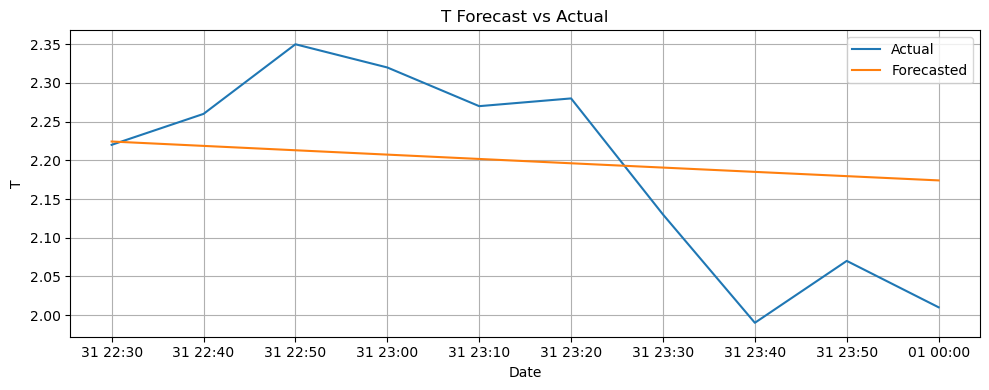

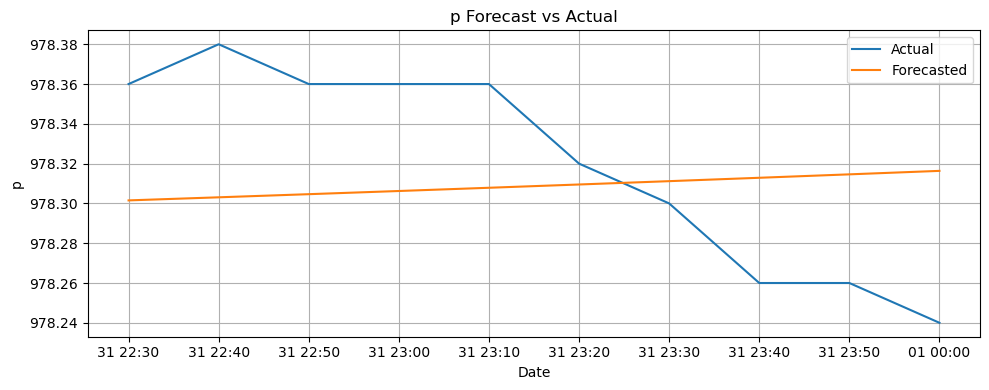

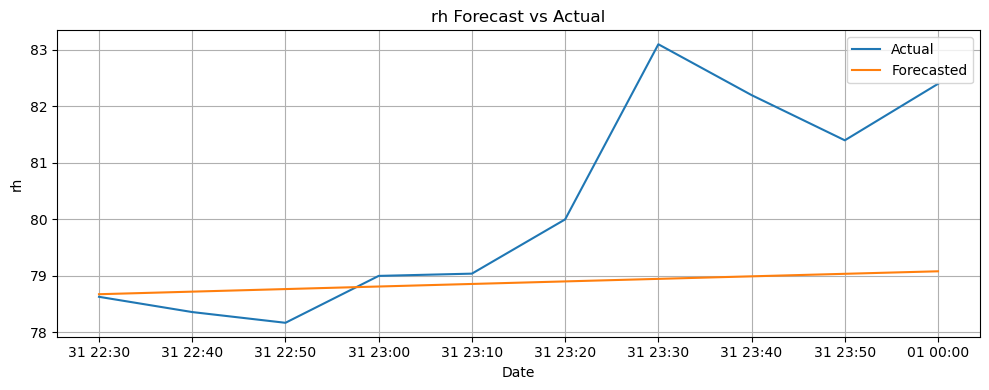

RMSE for T: 0.11
RMSE for p: 0.05
RMSE for rh: 2.14


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\cleaned_weather.csv", parse_dates=['date'], index_col='date')

# Select multiple relevant columns for multivariate time series
selected_data = df[['T', 'p', 'rh']]

# Handle missing values if any
selected_data = selected_data.fillna(method='ffill')

# Split the dataset into training and testing sets
n_obs = 10  # number of observations to forecast
df_train = selected_data[:-n_obs]
df_test = selected_data[-n_obs:]

# Fit the VAR model
model = VAR(df_train)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(df_train.values[-model_fit.k_ar:], steps=n_obs)
forecast_df = pd.DataFrame(forecast, index=df_test.index, columns=selected_data.columns)

# Plot actual vs predicted values for each variable
for column in selected_data.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df_test[column], label='Actual')
    plt.plot(forecast_df[column], label='Forecasted')
    plt.title(f'{column} Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calculate RMSE for each variable
for column in selected_data.columns:
    rmse = np.sqrt(mean_squared_error(df_test[column], forecast_df[column]))
    print(f'RMSE for {column}: {rmse:.2f}')
